# MTA Analysis Project

### EDA
- Done by: Sara AlAbdulsalam
- SDAIA ACADIMY


#### Aquire Data


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('seaborn')  

In [2]:
#Aquire data for the first five months on 2021
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [210102, 210109, 210116, 210123, 210130, 210206, 210213, 210220, 210227, 210306, 210313, 210320, 210327, 210403, 210410, 210417, 210424, 210501, 210508, 210515, 210522, 210529]

turnstiles_df = get_data(week_nums)

In [3]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,03:00:00,REGULAR,7508509,2557569
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,07:00:00,REGULAR,7508511,2557581
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,11:00:00,REGULAR,7508531,2557636
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,15:00:00,REGULAR,7508610,2557667
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,19:00:00,REGULAR,7508767,2557689


In [4]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [5]:
#Remove extra white space from the column names
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [6]:
#Add a DATE and TIME column
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, format="%m/%d/%Y %H:%M:%S")

In [7]:
#Add a column that identfy turnstiles which is a combo of C/A, UNIT, SCP, and STATION  
turnstiles_df['TURNSTILE'] = turnstiles_df['C/A'] + '-' + turnstiles_df['UNIT'] + '-' + turnstiles_df['SCP']+ '-' + turnstiles_df['STATION']

In [8]:
# Sort data TURNSTILE and DATE_TIME and Get rid of the duplicate entry
turnstiles_df.sort_values(["TURNSTILE", "DATE_TIME"], inplace=True)
turnstiles_df.reset_index(drop = True,  inplace=True)
turnstiles_df.drop_duplicates(subset=["TURNSTILE", "DATE_TIME"], inplace=True)

In [9]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["TURNSTILE", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(10)

,TURNSTILE,DATE_TIME,ENTRIES
0,A002-R051-02-00-00-59 ST,2020-12-26 03:00:00,1
2371454,R138-R293-00-03-04-34 ST-PENN STA,2021-03-16 22:00:00,1
2371443,R138-R293-00-03-04-34 ST-PENN STA,2021-03-15 02:00:00,1
2371444,R138-R293-00-03-04-34 ST-PENN STA,2021-03-15 06:00:00,1
2371445,R138-R293-00-03-04-34 ST-PENN STA,2021-03-15 10:00:00,1
2371446,R138-R293-00-03-04-34 ST-PENN STA,2021-03-15 14:00:00,1
2371447,R138-R293-00-03-04-34 ST-PENN STA,2021-03-15 18:00:00,1
2371448,R138-R293-00-03-04-34 ST-PENN STA,2021-03-15 22:00:00,1
2371449,R138-R293-00-03-04-34 ST-PENN STA,2021-03-16 02:00:00,1
2371450,R138-R293-00-03-04-34 ST-PENN STA,2021-03-16 06:00:00,1


In [10]:
#groub by TURNSTILE
turnstile_grouped = turnstiles_df.groupby(['TURNSTILE'])

In [11]:
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,03:00:00,REGULAR,7508509,2557569,2020-12-26 03:00:00,A002-R051-02-00-00-59 ST
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,07:00:00,REGULAR,7508511,2557581,2020-12-26 07:00:00,A002-R051-02-00-00-59 ST
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,11:00:00,REGULAR,7508531,2557636,2020-12-26 11:00:00,A002-R051-02-00-00-59 ST
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,15:00:00,REGULAR,7508610,2557667,2020-12-26 15:00:00,A002-R051-02-00-00-59 ST
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,19:00:00,REGULAR,7508767,2557689,2020-12-26 19:00:00,A002-R051-02-00-00-59 ST
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557252,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/23/2021,05:00:00,REGULAR,5554,547,2021-04-23 05:00:00,TRAM2-R469-00-05-01-RIT-ROOSEVELT
3557253,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/23/2021,09:00:00,REGULAR,5554,547,2021-04-23 09:00:00,TRAM2-R469-00-05-01-RIT-ROOSEVELT
3557254,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/23/2021,13:00:00,REGULAR,5554,547,2021-04-23 13:00:00,TRAM2-R469-00-05-01-RIT-ROOSEVELT
3557255,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/23/2021,17:00:00,REGULAR,5554,547,2021-04-23 17:00:00,TRAM2-R469-00-05-01-RIT-ROOSEVELT


In [12]:
#Add two columns for the exact number of ENTRIES and EXITS
turnstiles_df['ENTRIES_NUM'] = turnstile_grouped['ENTRIES'].transform(pd.Series.diff)
turnstiles_df['EXITS_NUM'] = turnstile_grouped['EXITS'].transform(pd.Series.diff)

In [13]:
turnstiles_df.head(20)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE,ENTRIES_NUM,EXITS_NUM
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,03:00:00,REGULAR,7508509,2557569,2020-12-26 03:00:00,A002-R051-02-00-00-59 ST,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,07:00:00,REGULAR,7508511,2557581,2020-12-26 07:00:00,A002-R051-02-00-00-59 ST,2.0,12.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,11:00:00,REGULAR,7508531,2557636,2020-12-26 11:00:00,A002-R051-02-00-00-59 ST,20.0,55.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,15:00:00,REGULAR,7508610,2557667,2020-12-26 15:00:00,A002-R051-02-00-00-59 ST,79.0,31.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,19:00:00,REGULAR,7508767,2557689,2020-12-26 19:00:00,A002-R051-02-00-00-59 ST,157.0,22.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,23:00:00,REGULAR,7508852,2557704,2020-12-26 23:00:00,A002-R051-02-00-00-59 ST,85.0,15.0
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/27/2020,03:00:00,REGULAR,7508858,2557705,2020-12-27 03:00:00,A002-R051-02-00-00-59 ST,6.0,1.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/27/2020,07:00:00,REGULAR,7508862,2557711,2020-12-27 07:00:00,A002-R051-02-00-00-59 ST,4.0,6.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/27/2020,11:00:00,REGULAR,7508885,2557743,2020-12-27 11:00:00,A002-R051-02-00-00-59 ST,23.0,32.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/27/2020,15:00:00,REGULAR,7508955,2557778,2020-12-27 15:00:00,A002-R051-02-00-00-59 ST,70.0,35.0


In [14]:
#drop the null values
turnstiles_df.dropna(subset=["ENTRIES_NUM","EXITS_NUM"], axis=0, inplace = True)

In [15]:
#Remove any rows of negative ENTRIES and EXITS
turnstiles_df=turnstiles_df[(turnstiles_df.ENTRIES_NUM>=0) & (turnstiles_df.EXITS_NUM>=0)]

In [16]:
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE,ENTRIES_NUM,EXITS_NUM
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,07:00:00,REGULAR,7508511,2557581,2020-12-26 07:00:00,A002-R051-02-00-00-59 ST,2.0,12.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,11:00:00,REGULAR,7508531,2557636,2020-12-26 11:00:00,A002-R051-02-00-00-59 ST,20.0,55.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,15:00:00,REGULAR,7508610,2557667,2020-12-26 15:00:00,A002-R051-02-00-00-59 ST,79.0,31.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,19:00:00,REGULAR,7508767,2557689,2020-12-26 19:00:00,A002-R051-02-00-00-59 ST,157.0,22.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,23:00:00,REGULAR,7508852,2557704,2020-12-26 23:00:00,A002-R051-02-00-00-59 ST,85.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557252,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/23/2021,05:00:00,REGULAR,5554,547,2021-04-23 05:00:00,TRAM2-R469-00-05-01-RIT-ROOSEVELT,0.0,0.0
3557253,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/23/2021,09:00:00,REGULAR,5554,547,2021-04-23 09:00:00,TRAM2-R469-00-05-01-RIT-ROOSEVELT,0.0,0.0
3557254,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/23/2021,13:00:00,REGULAR,5554,547,2021-04-23 13:00:00,TRAM2-R469-00-05-01-RIT-ROOSEVELT,0.0,0.0
3557255,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/23/2021,17:00:00,REGULAR,5554,547,2021-04-23 17:00:00,TRAM2-R469-00-05-01-RIT-ROOSEVELT,0.0,0.0


In [18]:
#Add a column for the total traffic (ENTRIES_NUM + EXITS_NUM) and name it busy 
turnstiles_df['busy'] = turnstiles_df['ENTRIES_NUM'].values + turnstiles_df['EXITS_NUM'].values

In [46]:
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE,ENTRIES_NUM,EXITS_NUM,busy,WEEKDAY,WEEK_TYPE,DAY_TYPE
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,07:00:00,REGULAR,7508511,2557581,2020-12-26 07:00:00,A002-R051-02-00-00-59 ST,2.0,12.0,14.0,Saturday,Weekend,Weekend
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,11:00:00,REGULAR,7508531,2557636,2020-12-26 11:00:00,A002-R051-02-00-00-59 ST,20.0,55.0,75.0,Saturday,Weekend,Weekend
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,15:00:00,REGULAR,7508610,2557667,2020-12-26 15:00:00,A002-R051-02-00-00-59 ST,79.0,31.0,110.0,Saturday,Weekend,Weekend
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,19:00:00,REGULAR,7508767,2557689,2020-12-26 19:00:00,A002-R051-02-00-00-59 ST,157.0,22.0,179.0,Saturday,Weekend,Weekend
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,23:00:00,REGULAR,7508852,2557704,2020-12-26 23:00:00,A002-R051-02-00-00-59 ST,85.0,15.0,100.0,Saturday,Weekend,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557252,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/23/2021,05:00:00,REGULAR,5554,547,2021-04-23 05:00:00,TRAM2-R469-00-05-01-RIT-ROOSEVELT,0.0,0.0,0.0,Friday,Weekday,Weekday
3557253,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/23/2021,09:00:00,REGULAR,5554,547,2021-04-23 09:00:00,TRAM2-R469-00-05-01-RIT-ROOSEVELT,0.0,0.0,0.0,Friday,Weekday,Weekday
3557254,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/23/2021,13:00:00,REGULAR,5554,547,2021-04-23 13:00:00,TRAM2-R469-00-05-01-RIT-ROOSEVELT,0.0,0.0,0.0,Friday,Weekday,Weekday
3557255,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/23/2021,17:00:00,REGULAR,5554,547,2021-04-23 17:00:00,TRAM2-R469-00-05-01-RIT-ROOSEVELT,0.0,0.0,0.0,Friday,Weekday,Weekday


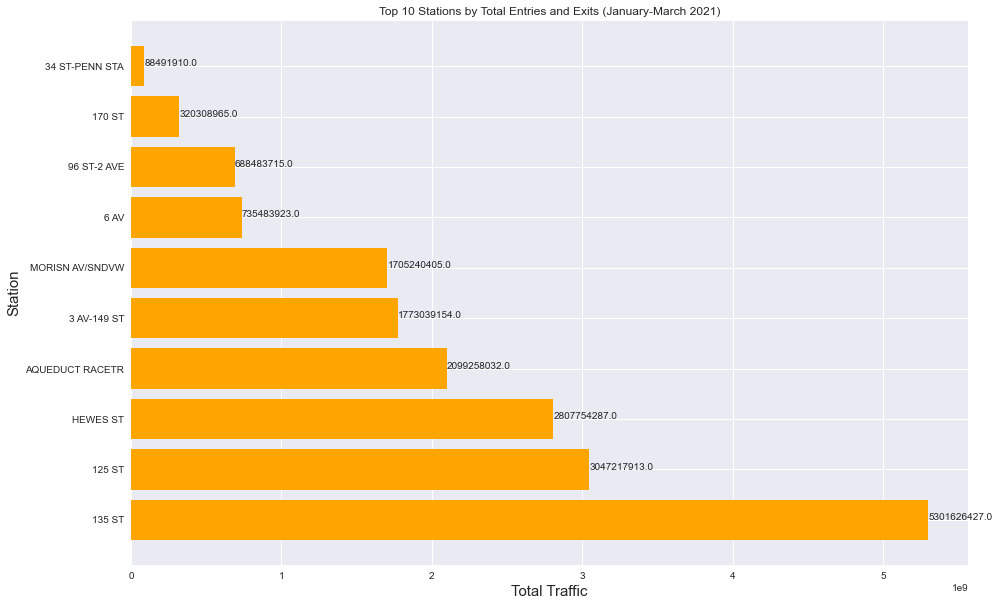

In [20]:
#get the top 10 station of total traffic
top_10_STATIONs =turnstiles_df.groupby(['STATION']).agg({'busy': sum}).sort_values(by = 'busy', ascending = False).reset_index().head(10)

#plot them aginst their busy (total traffic) values 
plt.figure(figsize=(15,10))
plt.title('Top 10 Stations by Total Entries and Exits (January-March 2021)') 
plt.xlabel('Total Traffic', fontsize= 15,family='sans-serif')
plt.ylabel('Station', fontsize= 15,family='sans-serif');
plt.barh(top_10_STATIONs['STATION'],top_10_STATIONs['busy'],color ='orange')

#show the value for each bar
for index, value in enumerate(top_10_STATIONs['busy']):
    plt.text(value,index,str(value))
    
plt.show()

In [21]:
#Get a dataframe of Dates and total traffic grouped by Date to plot it
turnstiles_df_busy = turnstiles_df[['DATE', 'busy']].groupby(['DATE']).sum().reset_index()
turnstiles_df_busy['DATE'] = pd.to_datetime(turnstiles_df_busy['DATE'])

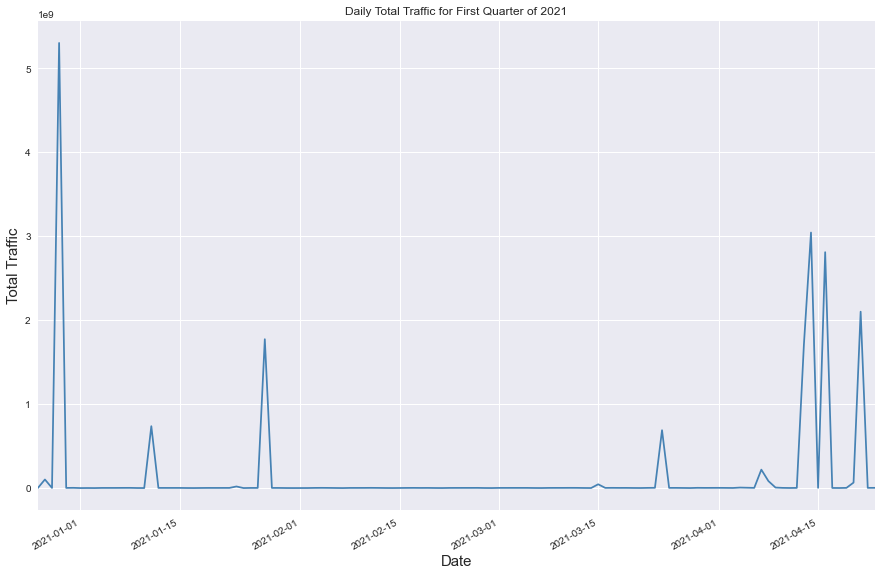

In [22]:
#plot the new data frame 
plt.figure(figsize=(15,10))
turnstiles_df_busy.set_index('DATE')['busy'].plot(color = 'steelblue')
plt.title('Daily Total Traffic for First Quarter of 2021') 
plt.xlabel('Date', fontsize= 15,family='sans-serif')
plt.ylabel('Total Traffic', fontsize= 15,family='sans-serif');
plt.show()
#Most traffic was at the beggining of the year

In [23]:
#Add a column for the Date weekday name 
turnstiles_df['WEEKDAY'] = (turnstiles_df['DATE_TIME']).dt.weekday_name

In [41]:
#Add a column that classify the date to Weekday or Weekend
def weelday_classification(date):
    if date> 4:
        return 'Weekend'
    else:
        return 'Weekday'
turnstiles_df['DAY_TYPE'] = (turnstiles_df['DATE_TIME']).dt.weekday.apply(weelday_classification)

In [42]:
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE,ENTRIES_NUM,EXITS_NUM,busy,WEEKDAY,WEEK_TYPE,DAY_TYPE
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,07:00:00,REGULAR,7508511,2557581,2020-12-26 07:00:00,A002-R051-02-00-00-59 ST,2.0,12.0,14.0,Saturday,Weekend,Weekend
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,11:00:00,REGULAR,7508531,2557636,2020-12-26 11:00:00,A002-R051-02-00-00-59 ST,20.0,55.0,75.0,Saturday,Weekend,Weekend
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,15:00:00,REGULAR,7508610,2557667,2020-12-26 15:00:00,A002-R051-02-00-00-59 ST,79.0,31.0,110.0,Saturday,Weekend,Weekend
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,19:00:00,REGULAR,7508767,2557689,2020-12-26 19:00:00,A002-R051-02-00-00-59 ST,157.0,22.0,179.0,Saturday,Weekend,Weekend
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,23:00:00,REGULAR,7508852,2557704,2020-12-26 23:00:00,A002-R051-02-00-00-59 ST,85.0,15.0,100.0,Saturday,Weekend,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557252,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/23/2021,05:00:00,REGULAR,5554,547,2021-04-23 05:00:00,TRAM2-R469-00-05-01-RIT-ROOSEVELT,0.0,0.0,0.0,Friday,Weekday,Weekday
3557253,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/23/2021,09:00:00,REGULAR,5554,547,2021-04-23 09:00:00,TRAM2-R469-00-05-01-RIT-ROOSEVELT,0.0,0.0,0.0,Friday,Weekday,Weekday
3557254,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/23/2021,13:00:00,REGULAR,5554,547,2021-04-23 13:00:00,TRAM2-R469-00-05-01-RIT-ROOSEVELT,0.0,0.0,0.0,Friday,Weekday,Weekday
3557255,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/23/2021,17:00:00,REGULAR,5554,547,2021-04-23 17:00:00,TRAM2-R469-00-05-01-RIT-ROOSEVELT,0.0,0.0,0.0,Friday,Weekday,Weekday


In [25]:
#Have a new dataframe of the number of Emgergency exits which is the ENTRIE number - EXITS number divided by the total traffic
weekday_ave = turnstiles_df[['ENTRIES_NUM', 'EXITS_NUM', 'busy', 'WEEKDAY']].groupby('WEEKDAY').sum().reset_index().sort_values(by = 'WEEKDAY')
weekday_ave['Emgergency'] = (weekday_ave['ENTRIES_NUM'] - weekday_ave['EXITS_NUM'])/weekday_ave['busy']

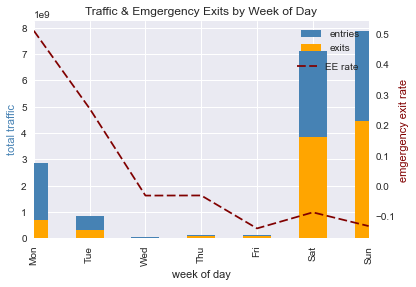

In [26]:
#Plot the Emgergency exits with the EXITS and ENTRIES for each day of the week 
from matplotlib.ticker import FuncFormatter

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
p1 = weekday_ave['busy'].plot(kind='bar', color='steelblue', ax=ax1, label = 'entries')
p1.legend(loc = 1)
p2 = weekday_ave['EXITS_NUM'].plot(kind='bar', color='orange', ax=ax1, label = 'exits')
p2.legend(loc = 1)
p3 = weekday_ave['Emgergency'].plot(kind='line', dashes = [5, 2], color='maroon', ax=ax2, label = 'EE rate')
p3.legend(loc = (0.775, 0.75)) 

plt.xticks((0,1,2,3,4,5,6),('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'))
ax1.set_xlabel('week of day')
ax1.set_ylabel('total traffic', color='steelblue')

ax2.set_ylabel('emgergency exit rate', color='maroon')
ax2.grid(False)
plt.title('Traffic & Emgergency Exits by Week of Day', size = 12) 
plt.show()

In [43]:
#Have a new dataframe of the number of Emgergency exits which is the ENTRIE number - EXITS number divided by the total traffic
weekday_ave = turnstiles_df[['ENTRIES_NUM', 'EXITS_NUM', 'busy', 'DAY_TYPE']].groupby('DAY_TYPE').sum().reset_index().sort_values(by = 'DAY_TYPE')
weekday_ave['Emgergency'] = (weekday_ave['ENTRIES_NUM'] - weekday_ave['EXITS_NUM'])/weekday_ave['busy']
weekday_ave

,DAY_TYPE,ENTRIES_NUM,EXITS_NUM,busy,Emgergency
0,Weekday,9.421281e+09,9.417284e+09,1.883856e+10,0.000212
1,Weekend,9.311458e+07,9.910139e+07,1.922160e+08,-0.031146


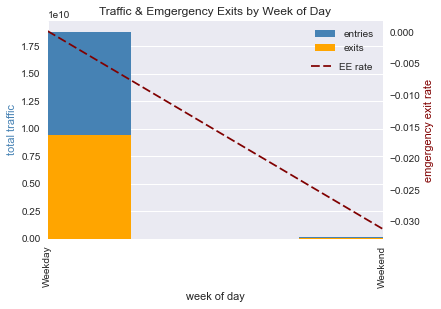

In [44]:
#Plot the Emgergency exits with the EXITS and ENTRIES for the weekends and weekdays

from matplotlib.ticker import FuncFormatter

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
p1 = weekday_ave['busy'].plot(kind='bar', color='steelblue', ax=ax1, label = 'entries')
p1.legend(loc = 1)
p2 = weekday_ave['EXITS_NUM'].plot(kind='bar', color='orange', ax=ax1, label = 'exits')
p2.legend(loc = 1)
p3 = weekday_ave['Emgergency'].plot(kind='line', dashes = [5, 2], color='maroon', ax=ax2, label = 'EE rate')
p3.legend(loc = (0.775, 0.75)) 

plt.xticks((0,1),('Weekday', 'Weekend'))
ax1.set_xlabel('week of day')
ax1.set_ylabel('total traffic', color='steelblue')

ax2.set_ylabel('emgergency exit rate', color='maroon')
ax2.grid(False)
plt.title('Traffic & Emgergency Exits by Week of Day', size = 12) 
plt.show()